In [3]:
from california import *


c:\Users\hamad\Desktop\Homeless Project\my_venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
cali = california("./")
# help(cali)

# PCA Analysis on the Dataset:

Using all the features and datapoints form the merged HUD/census homelessness kaggle dataset for california, this code prints the top 5 features used for each of the two principal components the data points have been mapped to, and plots a color map with the values of the points with respect to each of the two PC's. The colors of the points represent their log base 10 value of homelessness.

Observation: There appears to be a lot of variability in homelessness as you move from more positive to more negative values for PC1 which has notable features like the rate of individuals who are white, ages 25 plus, and ages 70 - 79. This shows that varying these features yields much more varied homelessness rates which means that they are important in understanding which regions may be more affected by rates of homelessness.

['RACE_WHITE_NH_PCT', 'RACE_HISPANIC_ANY_PCT', 'RACE_ASIAN_NH_PCT', 'RACE_BLACK_NH_PCT', 'FAMILY_HH_CHILD_LT18_PCT']
[0.03214408 0.03051894 0.02485433 0.00835765 0.00385443]

Max Rate: 0.0587983619583155

Min Rate: 0.0

mean Rate: 0.0037357912779811004

Median Rate: 0.00165216307334815


Top features contributing to PCA1:

['NONFAMILY_SINGLE_MALE_PCT', 'AGE_25_PLUS_PCT', 'AGE_70_79_PCT', 'FAMILY_HH_TOTAL', 'RACE_WHITE_NH_PCT'] 



Top features contributing to PCA2:

['NONVETERAN_POP_PCT', 'RACE_ASIAN_NH_PCT', 'AGE_35_44_PCT', 'AGE_25_34_PCT', 'VETERAN_POP_PCT'] 




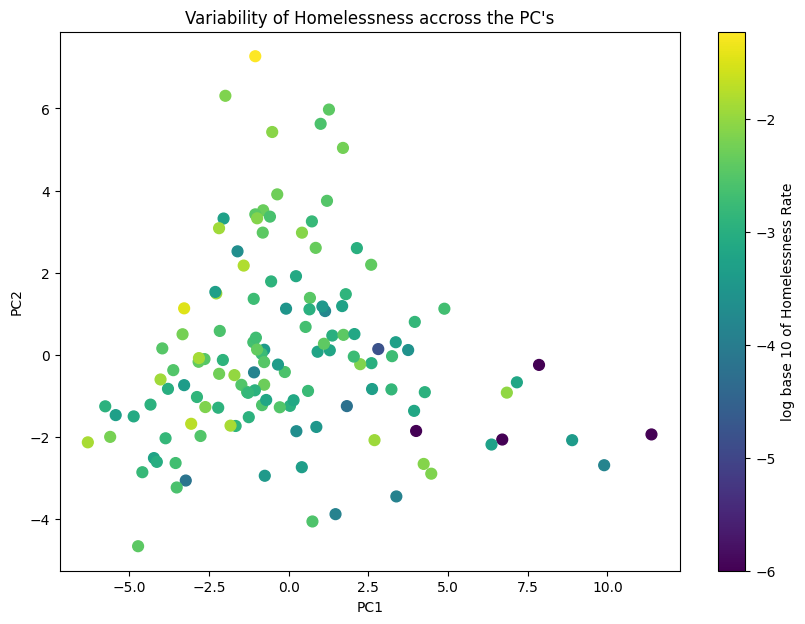

In [6]:
cali.display_highest_coefficient_vals("all",5)
cali.display_homelessness_stats()
cali.pca_plot()

# Which Demographic features correlate with homelessness rates?

We find the Pearson correlation coefficients of 3 subsets of the merged HUD/census kaggle dataset for california.

 1. All features
 1. Race
 2. Age

### Observations:
 
 1. All features: Population rates for ages 25 - 34 are most correlated with homelessness rates.
 2. Race: Higher African American population rates correlate positively with homelessness, while higher Caucasian rates correlate negatively. The reason for this dichotomy could be due to the fact that more african americans in California live in lower income neighbourhoods.
 3. Age: Higher population rates for ages 25 - 34 and 35 - 44 correlate positively with homelessness rates.

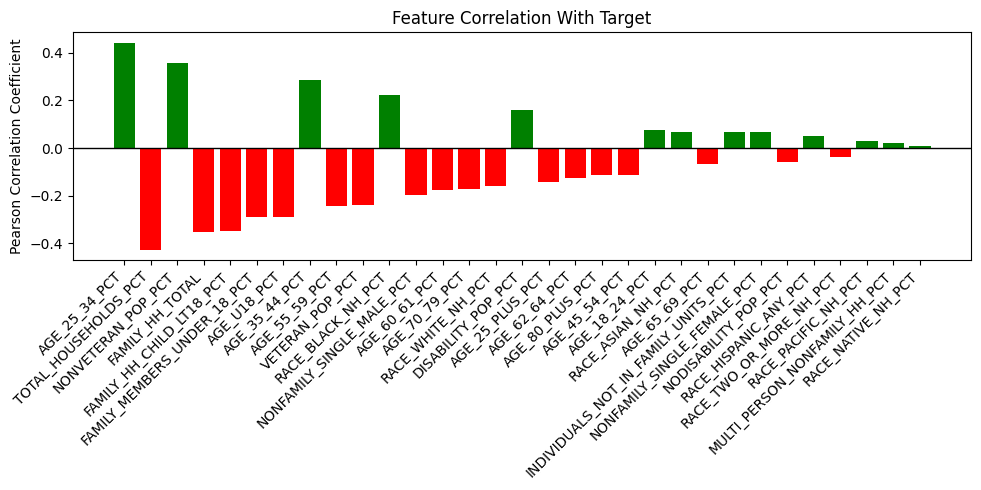

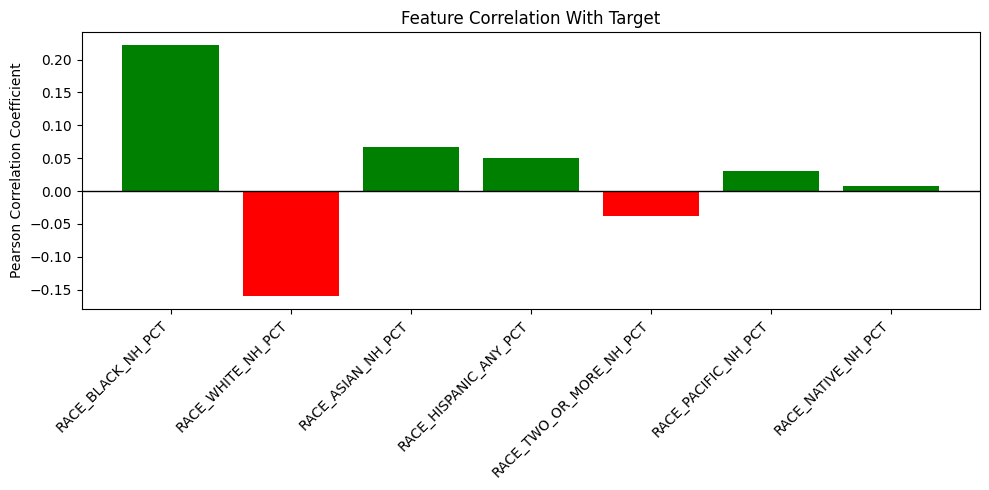

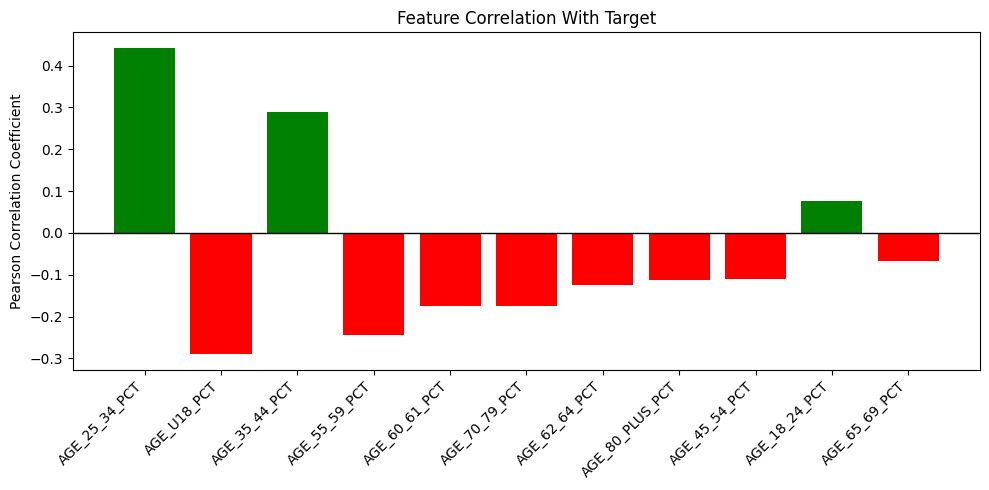

In [8]:
cali.display_correlations('all')
cali.display_correlations('race')
cali.display_correlations('age')

# Which features have most weightage for the linear regression models trained on the 3 subsets of the dataset?

We again focus on the 3 subsets of the complete data, this time focusing on training linear regression models to predict homelessness.

1. All features
2. Race
3. Age

Naively, the features that have higher weights in these models can be interpreted as being more important for predicting homelessness rates.

### Observations:

1. All features: The population rates of caucasians, hispanics and asians were the most weighted features. The explanation for why the rate of african american populations wasn't one of the top 5 could be because the base rate of the africa american population in most regions is quite low.

2. Race: We see the same 3 features as the first subset, but with the rate of hispanics having more weightage which could indicate that higher hispanic population rates may mean higher homelessness rates in a region which, again, leads to different socioeconomic factors for why that may be the case.

3. Age: Again rates of younger populations had more weightage. Another observation recurring observation is the population rates of age ranges 70 - 79. This was one of the top weight features for the first principal component and also indicates a demographic requiring more policymaker attention.

### Linear Model Trained on all features of the Dataset

In [11]:
cali.display_highest_coefficient_vals("all",5)

['RACE_WHITE_NH_PCT', 'RACE_HISPANIC_ANY_PCT', 'RACE_ASIAN_NH_PCT', 'RACE_BLACK_NH_PCT', 'FAMILY_HH_CHILD_LT18_PCT']
[0.03214408 0.03051894 0.02485433 0.00835765 0.00385443]


### Linear Model Trained on only Race Demographics

In [12]:
cali.display_highest_coefficient_vals("race",5)

['RACE_HISPANIC_ANY_PCT', 'RACE_WHITE_NH_PCT', 'RACE_ASIAN_NH_PCT', 'RACE_BLACK_NH_PCT', 'RACE_TWO_OR_MORE_NH_PCT']
[0.06741142 0.06563792 0.05293081 0.01457186 0.00607637]


### Linear Model Trained on only Age Demographics

In [13]:
cali.display_highest_coefficient_vals("age",5)

['AGE_U18_PCT', 'AGE_25_34_PCT', 'AGE_70_79_PCT', 'AGE_65_69_PCT', 'AGE_55_59_PCT']
[0.00153233 0.00145108 0.00114542 0.00099048 0.00088243]


# Statistics of Complete Dataset

cali.display_homelessness_stats()

# Which Features Provide Most Predictive Value: Shapley Values

Shapley values provide a theoretical framework for explaining which features are most important in explaining a model's predictions. This is done by assigning values called "Shapley values" to each of the features a model uses when it is making a prediction. The Shapley value of each feature is determined by summing the increase or decrease in predictive value of a model when adding the feature to every possible permutation of the other features in the dataset. It is an idea borrowed from cooperative game theory which treats every feature as a player. Using these Shapley values we can analyse what set or structure of demographic features our trained linear models exploit in the dataset to make their predictions. This gives us insight into which features contain most predictive value for rates of homelessness.

Observations:

1. All features: Highest shapley values are race population rates with the highest being the population rates of caucasians followed by asian, hispanics and african americans. Race appears to be consistently important in predicting homelessness. In particular, we observed from the previous graphs that a region having a higher caucasian population rate was likely have a lower homelessness rate than the rest of the races.

2. Race: The next plot of shapley values reiterates the same observation shown in previous plots where population rates of caucasians, hispanics, and asians were mostly exploited when making predictions while that of african americans was last.

3. Age: We observe that the population rates of young adults ages 25 - 34 and of a specific older group ages 70 - 79 had the most predictive impact for this model as they had the highest shapley values.

For the demographic of individuals between ages 70 - 79, this could be the fact that social security and social welfare by the state may not be supportive enough for them, and that their inability to be as productive for their age means that they don't have enough to support themselves and find shelter. Thus, the hypothesis of whether social welfare networks for the elderly in califorina are robust enough is what could be deduced from the observations shown in this plot and the previous correlation/PCA plots.

Bar plot of features with top shapley values for the model trained on all the features of the dataset


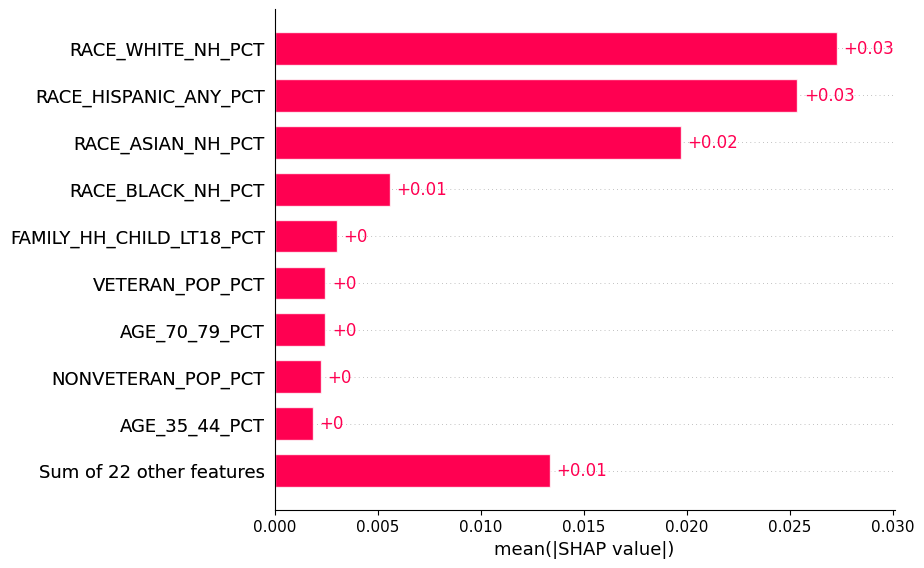

Bar plot of features with top shapley values for the model trained on only the race demographic rates


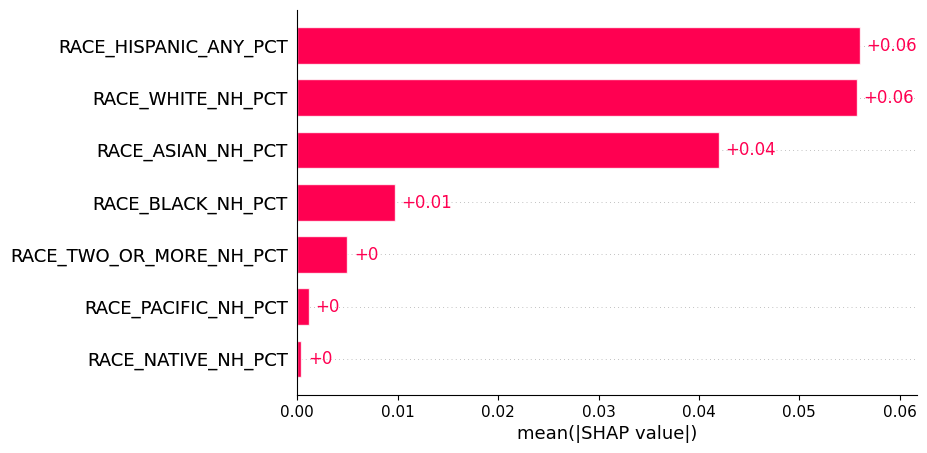

Bar plot of features with top shapley values for the model trained on only the age demographic rates


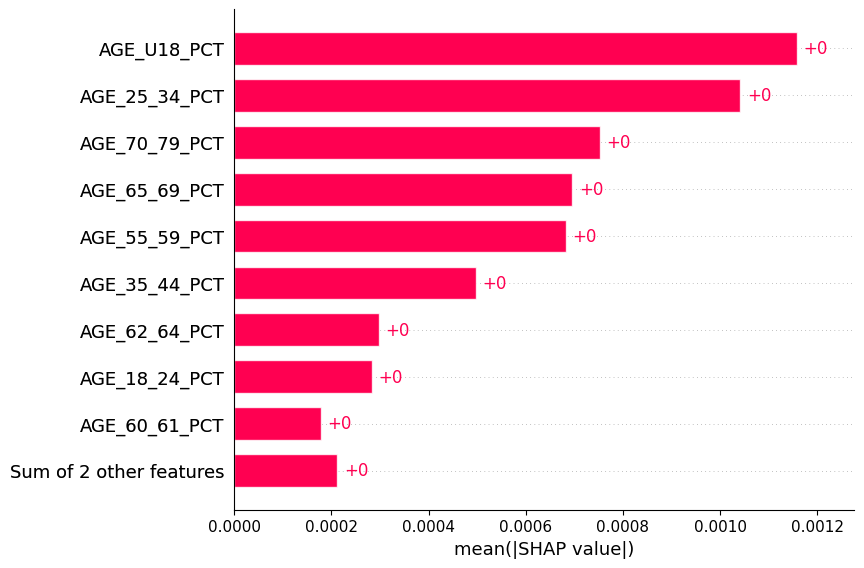

In [21]:
print("Bar plot of features with top shapley values for the model trained on all the features of the dataset")
cali.shap_bar_plot("all")
print("Bar plot of features with top shapley values for the model trained on only the race demographic rates")
cali.shap_bar_plot("race")
print("Bar plot of features with top shapley values for the model trained on only the age demographic rates")
cali.shap_bar_plot("age")